## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Load dataset

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.sample(frac=0.1).to_csv('sample_1.csv', index=False)

In [4]:
df.sample(frac=0.2).to_csv('sample_2.csv', index=False)

In [5]:
df.sample(frac=0.34).to_csv('sample_3.csv', index=False)

## Shape of the dataset

In [6]:
df.shape

(284807, 31)

## Sample observations from data

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Columns of the dataset

In [8]:
df.columns.values.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

## Datatypes of the columns

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Check for the duplicates

In [10]:
df.drop_duplicates().shape

(283726, 31)

## Check for the missing data

In [11]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Descriptive statistics of the data

In [12]:
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 
        'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
df[cols].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


## Class Imbalance

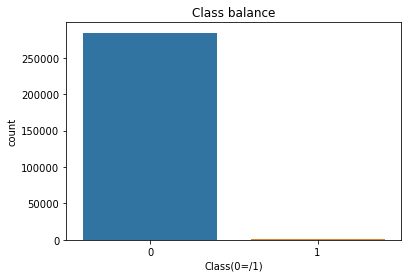

In [13]:
fig , ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x='Class', data=df, order=df['Class'].value_counts().index)
ax.set_title("Class balance")
ax.set_xlabel('Class(0=/1)')
plt.show()

## Correlation Matrix

In [14]:
corrMat = df[['Time', 'Amount', 'Class']].corr(method='pearson')

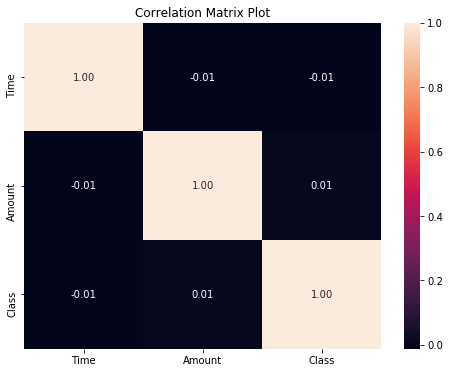

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrMat, annot=True, fmt='.2f', ax=ax)
plt.title("Correlation Matrix Plot")
plt.show()

## Variations in Amount

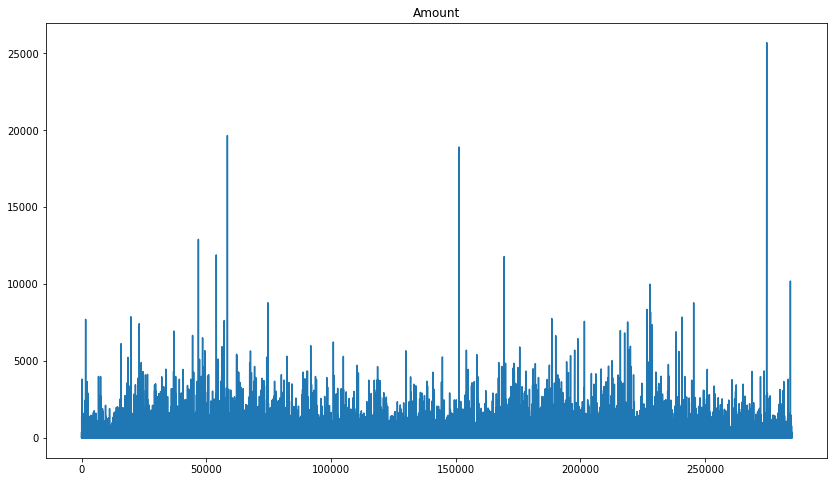

In [16]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data = df['Amount'], ax=ax)
plt.title("Amount")
plt.show()

## Time vs Amount

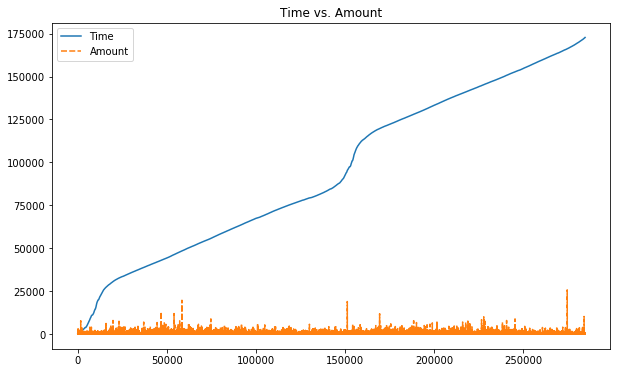

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data = df[['Time', 'Amount']], ax=ax)
plt.title("Time vs. Amount")
plt.legend(loc='upper left')
plt.show()

## Handling class imbalance using upsampling

In [19]:
df['Class'].value_counts()[0]

284315

In [20]:
from sklearn.utils import resample
df_class0 = df.loc[df.Class == 0].copy()
df_class1 = df.loc[df.Class == 1].copy()

upsampled = resample(df_class1,
                             replace=True,  # sample with replacement
                             n_samples=df['Class'].value_counts()[0],  # to match majority class
                             random_state=111) 
df_upsampled = pd.concat([df_class0, upsampled])

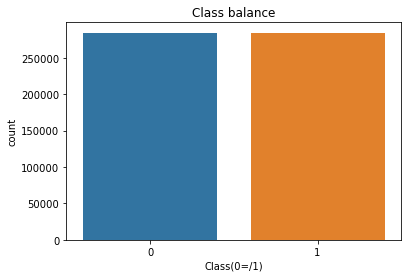

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x='Class', data=df_upsampled, order=df['Class'].value_counts().index)
ax.set_title("Class balance")
ax.set_xlabel('Class(0=/1)')
plt.show()

In [22]:
df_upsampled['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

## Extract Features and Class variable

In [23]:
X = df_upsampled.drop(columns=['Time','Class'])
y = df_upsampled['Class']

# Cross-validation

In [24]:
cv = KFold(n_splits=10, random_state=111, shuffle=True)

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
          'f1': 'f1'}

## Models

In [25]:
models = {'Logistic Regression': LogisticRegression(random_state=123),
            'SVM': LinearSVC(random_state=123),
             'Decision Tree': DecisionTreeClassifier(random_state=123),
             'Random Forest': RandomForestClassifier(random_state=123)
         }

## Model Validation using 10-fold cross validation

In [26]:
for model, clf in enumerate(models):
    # evaluation
    print('****** ' + clf + ' ******')
    print('******************************************************************************')
    scores = cross_validate(models[clf], X, y, scoring=scoring, cv=cv, n_jobs=-1)
    res = pd.DataFrame(scores)

    # 10-fold cross validation results
    print(res)
    print('******************************************************************************')
    
    print('Mean Accuracy %.3f' %res['test_accuracy'].mean())
    print('Mean Precision %.3f' %res['test_precision'].mean())
    print('Mean Recall %.3f' %res['test_recall'].mean())
    print('Mean F1-Score %.3f' %res['test_f1'].mean())
    print('******************************************************************************\n\n')

****** Logistic Regression ******
******************************************************************************
    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  31.078072    0.083915       0.948437        0.974539     0.920646  0.946826
1  30.105684    0.069844       0.945747        0.973265     0.916546  0.944055
2  29.490492    0.165792       0.946345        0.972547     0.918318  0.944655
3  29.194228    0.168972       0.947945        0.973609     0.920487  0.946303
4  29.503129    0.212736       0.946960        0.973576     0.918438  0.945203
5  25.530728    0.251929       0.948561        0.976585     0.919674  0.947275
6  27.966693    0.253991       0.946327        0.972997     0.917665  0.944521
7  27.125619    0.188130       0.946609        0.975560     0.916830  0.945283
8   9.714884    0.053025       0.946046        0.971958     0.919314  0.944903
9  10.121801    0.048152       0.948613        0.974355     0.921541  0.947212
******************

In [27]:
import joblib

In [29]:
lr = LogisticRegression(random_state=123)
lr.fit(X, y)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
joblib.dump(lr, './logistic_regression/lr_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: './logistic_regression/lr_model.pkl'

In [ ]:
svm = LinearSVC(random_state=123)
svm.fit(X, y)

In [29]:
joblib.dump(svm, './svm/svm_model.pkl')

['./svm/svm_model.pkl']

In [30]:
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [31]:
joblib.dump(dt, './decision_tree/dt_model.pkl')

['./decision_tree/dt_model.pkl']

In [32]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [33]:
joblib.dump(rf, './random_forest/rf_model.pkl')

['./random_forest/rf_model.pkl']